In [1]:
# Vamos rodar gráficos estáticos, usar o estilo "seaborn-whitegrid" 
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd
from numpy import *
%matplotlib inline
pasta='/home/andre/libRadtran-2.0.4/data/atmmod/'
data1=sorted(glob.glob(pasta+'/afglt.dat'))
cols1=['z(km)','p(mbar)','t(K)','air(cm-3)','o3(cm-3)','o2(cm-3)','h2o(cm-3)','co2(cm-3)','no2(cm-3)']

In [2]:
### Arrumando os dados:
for file in data1:
    dados1 = pd.read_csv(file, skiprows=2, sep="\s+", names=cols1, na_values=["-9999"])
dados1.head(5)

,z(km),p(mbar),t(K),air(cm-3),o3(cm-3),o2(cm-3),h2o(cm-3),co2(cm-3),no2(cm-3)
0,120.0,0.00002,380.0,4.288552e+11,211.25,3.063125e+10,84500.01,1.478750e+07,63.7975
1,115.0,0.00004,299.7,8.700167e+11,4353.00,8.183640e+10,208944.00,3.482400e+07,134.9430
2,110.0,0.00006,241.6,1.939631e+12,97050.00,2.329200e+11,543480.00,1.164600e+08,308.6190
3,105.0,0.00013,212.0,4.441394e+12,889000.10,6.223000e+11,1511300.00,4.889500e+08,728.9800
4,100.0,0.00029,190.7,1.097638e+13,4392000.00,1.756800e+12,4392000.00,2.141100e+09,1866.6000


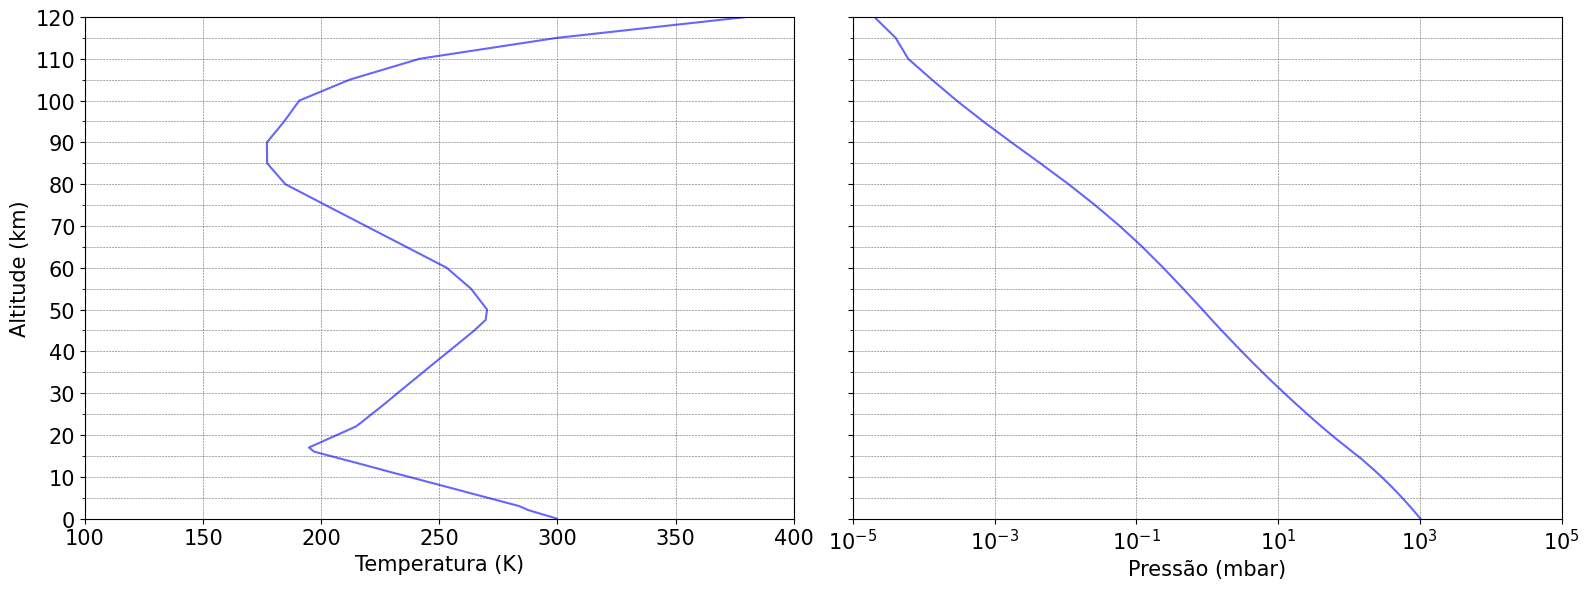

In [13]:
#### Fazendo a figura e os eixos (os "axs"):
fig, axs = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 6), facecolor='white')
axes = [axs[0], axs[1]]
tf = 15

for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].grid(visible=True, which='both', axis='both', color='dimgray', linestyle='--', linewidth=0.4)
    axes[i].set(ylim=[0, 120], facecolor='white')
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(10))
    axes[i].yaxis.set_minor_locator(ticker.MultipleLocator(5))
    
    if i == 0:
        axes[i].set_ylabel(u'Altitude (km)', fontsize=tf, color='black')
        axes[i].set_xlabel(u'Temperatura (K)', fontsize=tf, color='black')
        axes[i].set(xlim=[100, 400], facecolor='white')
        axes[i].xaxis.set_major_locator(ticker.MultipleLocator(50))
#         axes[i].xaxis.set_minor_locator(ticker.MultipleLocator(25))
        axes[i].tick_params(labelsize=tf)
        axes[i].plot(dados1['t(K)'], dados1['z(km)'], '-b', alpha=0.6, linewidth=1.5)
    if i == 1:
        axes[i].set_xlabel(u'Pressão (mbar)', fontsize=tf, color='black')
        axes[i].set_xscale('log')
        axes[i].set(xlim=[0.00001, 100000], facecolor='white')
        axes[i].tick_params(labelsize=tf)
        axes[i].plot(dados1['p(mbar)'], dados1['z(km)'], '-b', alpha=0.6, linewidth=1.5)  
    
plt.tight_layout()
plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Perfis_TeP_afgltdat.png', 
            dpi=400, bbox_inches='tight', facecolor='white')

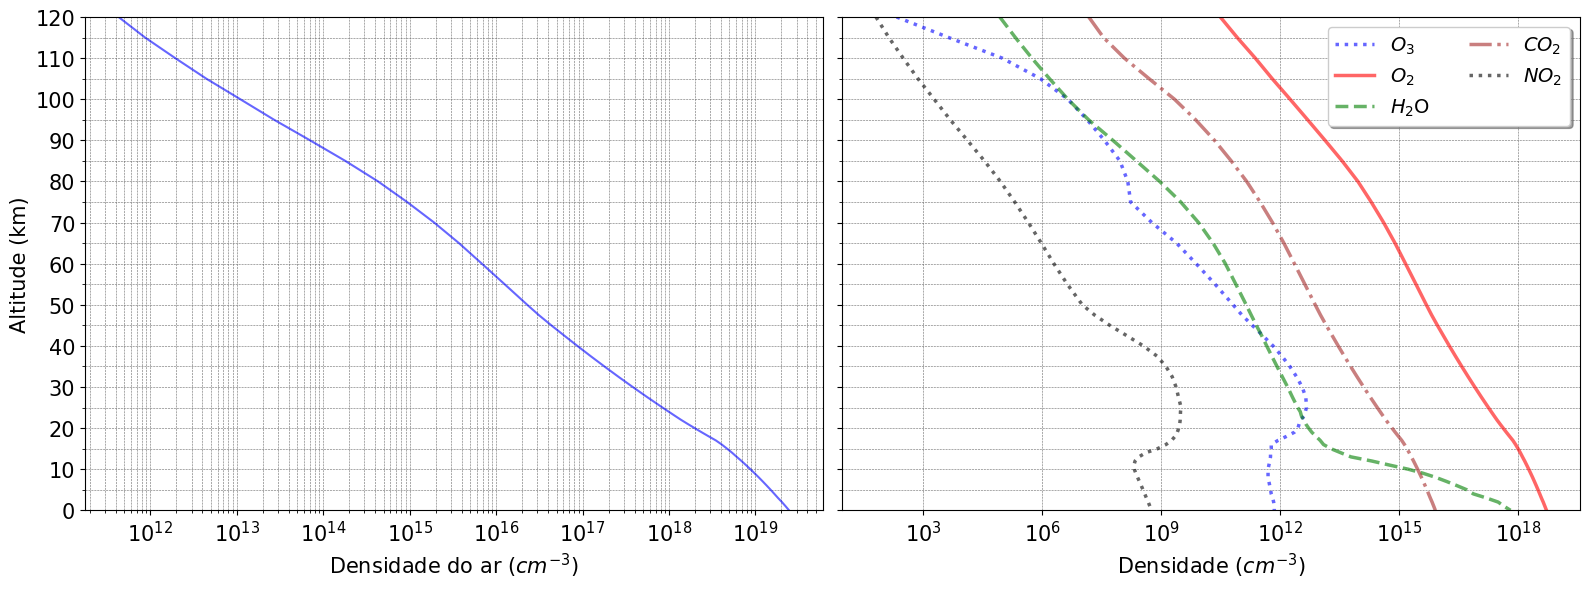

In [21]:
#### Fazendo a figura e os eixos (os "axs"):
fig, axs = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 6), facecolor='white')
axes = [axs[0], axs[1]]
tf = 15

for i in range(len(axes)):
    plt.setp(axes[i].get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
    plt.setp(axes[i].get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
    axes[i].grid(visible=True, which='both', axis='both', color='dimgray', linestyle='--', linewidth=0.4)
    axes[i].set(ylim=[0, 120], facecolor='white')
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(10))
    axes[i].yaxis.set_minor_locator(ticker.MultipleLocator(5))
    
    if i == 0:
        axes[i].set_ylabel(u'Altitude (km)', fontsize=tf, color='black')
        axes[i].set_xlabel(u'Densidade do ar ($cm^{-3}$)', fontsize=tf, color='black')
        axes[i].set_xscale('log')
        axes[i].tick_params(labelsize=tf)
        axes[i].plot(dados1['air(cm-3)'], dados1['z(km)'], '-b', alpha=0.6, linewidth=1.5)
    if i == 1:
        axes[i].set_xlabel(u'Densidade ($cm^{-3}$)', fontsize=tf, color='black')
        axes[i].set_xscale('log')
        axes[i].tick_params(labelsize=tf)
        axes[i].plot(dados1['o3(cm-3)'], dados1['z(km)'], linestyle=':', color='blue', label='$O_{3}$', alpha=0.6, linewidth=2.5)
        axes[i].plot(dados1['o2(cm-3)'], dados1['z(km)'], linestyle='-', color='red', label='$O_{2}$', alpha=0.6, linewidth=2.5)
        axes[i].plot(dados1['h2o(cm-3)'], dados1['z(km)'], linestyle='--', color='green', label='$H_{2}$O', alpha=0.6, linewidth=2.5)
        axes[i].plot(dados1['co2(cm-3)'], dados1['z(km)'], linestyle='-.', color='brown', label='$CO_{2}$', alpha=0.6, linewidth=2.5)
        axes[i].plot(dados1['no2(cm-3)'], dados1['z(km)'], linestyle=':', color='black', label='$NO_{2}$', alpha=0.6, linewidth=2.5) 
        axes[i].legend(loc='best', ncol=2, fontsize=tf-1, fancybox='True', shadow='True', frameon=True)  
    
plt.tight_layout()
plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Perfis_Gases_afgltdat.png', 
            dpi=400, bbox_inches='tight', facecolor='white')

In [22]:
#######################################

In [23]:
pasta='/home/andre/libRadtran-2.0.4/data/atmmod/'
file1 = sorted(glob.glob(pasta+'afglt_ch4_vmr.csv'))
cols1=['z(km)','ch4(cm-3)']
file2 = sorted(glob.glob(pasta+'afglt_co_vmr.csv'))
cols2=['z(km)','co(cm-3)']
file3 = sorted(glob.glob(pasta+'afglt_n2o_vmr.csv'))
cols3=['z(km)','n2o(cm-3)']
file4 = sorted(glob.glob(pasta+'afglt_n2_vmr.csv'))
cols4=['z(km)','n2(cm-3)']
for file in file1:
    ch4 = pd.read_csv(file, skiprows=2, sep="\s+", names=cols1, na_values=["-9999"])
for file in file2:
    co = pd.read_csv(file, skiprows=2, sep="\s+", names=cols2, na_values=["-9999"])
for file in file3:
    n2o = pd.read_csv(file, skiprows=2, sep="\s+", names=cols3, na_values=["-9999"])
for file in file4:
    n2 = pd.read_csv(file, skiprows=2, sep="\s+", names=cols4, na_values=["-9999"])

In [24]:
obj = {'z': ch4['z(km)'], 'ch4': ch4['ch4(cm-3)'], 'co': co['co(cm-3)'], 'n2o': n2o['n2o(cm-3)'],
      'n2': n2['n2(cm-3)']}
df = pd.DataFrame(obj)
df.head()

,z,ch4,co,n2o,n2
0,120.0,3.000000e-08,0.000050,1.851000e-10,0.760
1,115.0,6.000000e-08,0.000041,2.120000e-10,0.765
2,110.0,9.500000e-08,0.000034,2.443000e-10,0.770
3,105.0,1.100000e-07,0.000025,2.837000e-10,0.774
4,100.0,1.200000e-07,0.000017,3.323000e-10,0.777


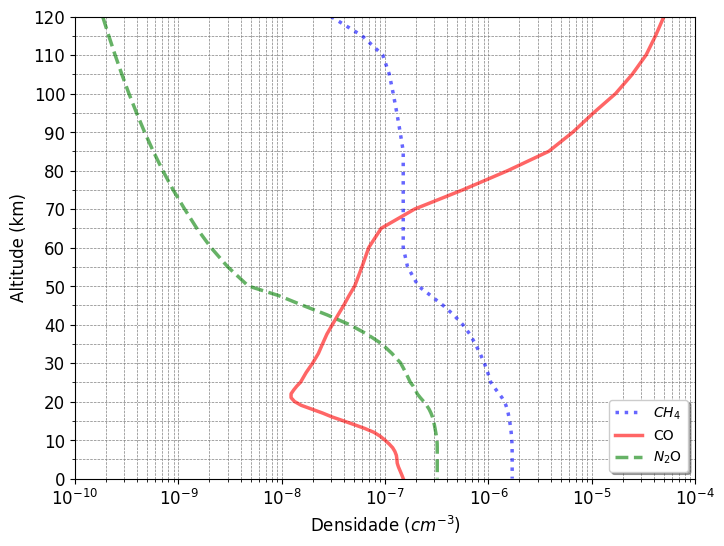

In [26]:
########### Densities:
fig = plt.figure(figsize=(8, 6), facecolor='white') 
ax = fig.add_subplot(1,1,1)

tf = 12
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=tf, color='black')

ax.plot(df['ch4'], df['z'], linestyle=':', color='blue', label='$CH_{4}$', alpha=0.6, linewidth=2.5)
ax.plot(df['co'], df['z'], linestyle='-', color='red', label='CO', alpha=0.6, linewidth=2.5)
ax.plot(df['n2o'], df['z'], linestyle='--', color='green', label='$N_{2}$O', alpha=0.6, linewidth=2.5)
# ax.plot(df['n2'], df['z'], linestyle='-.', color='brown', label='$N_{2}$', alpha=0.6, linewidth=2.5)

ax.set_xlabel('Densidade ($cm^{-3}$)', fontsize=tf, color='black')
ax.set_ylabel('Altitude (km)', fontsize=tf, color='black')
# ax.set_title('Profiles from http://www.atm.ox.ac.uk/RFM/atm/', fontsize=tf, color='black')

ax.set_xscale('log')

ax.set(xlim=[0.0000000001, 0.0001], ylim=[0, 120], facecolor='white')
# ax.set_ylim(0, 120)

ax.legend(loc='lower right', ncol=1, fontsize=tf-2, fancybox='True', shadow='True', frameon=True)
ax.grid(visible=True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.005))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Perfis_Gases_Rarefeitos_Oxford.png', 
            dpi=400, bbox_inches='tight', facecolor='white')

In [27]:
###################################

In [39]:
pasta = '/home/andre/libRadtran-2.0.4/codigos_doutorado/'
data1 = sorted(glob.glob(pasta+'Espalhamento_Rayleigh_Limpo_Solar_T3.out'))
cols1 = ["comp", "zout", 'sza', "edir", 'eup']

In [40]:
# Arrumando os dados:
for file in data1:
    dados1 = pd.read_csv(file, skiprows=0, sep="\s+", names=cols1, na_values=["-9999"])
dados1

,comp,zout,sza,edir,eup
0,250.0,119.949997,10.187,78.496690,0.077607
1,250.1,119.949997,10.187,74.457900,0.073574
2,250.2,119.949997,10.187,27.715790,0.027372
3,250.3,119.949997,10.187,77.030850,0.076034
4,250.4,119.949997,10.187,66.840610,0.065940
...,...,...,...,...,...
47496,4999.6,119.949997,10.187,3.601707,0.020897
47497,4999.7,119.949997,10.187,3.143855,0.018241
47498,4999.8,119.949997,10.187,2.732466,0.015854
47499,4999.9,119.949997,10.187,3.427248,0.019885


In [41]:
## Convertendo de mW/m².nm para W/m².nm:
dados1.edir = dados1.edir/1000
dados1.eup = dados1.eup/1000

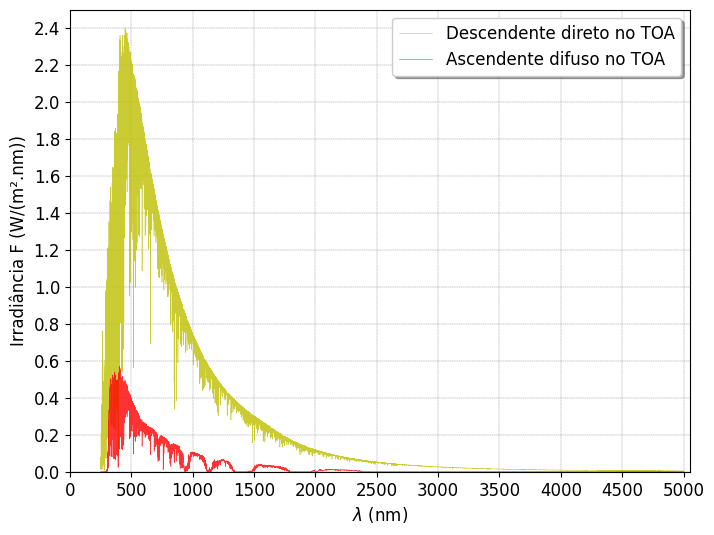

In [54]:
fig = plt.figure(figsize=(8, 6), facecolor='white') 
ax = fig.add_subplot(1,1,1)

tf = 12
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=tf, color='black')

ax.plot(dados1.comp, dados1.edir, '-y', label='Descendente direto no TOA', alpha=0.8, linewidth=0.4)
ax.plot(dados1.comp, dados1.eup, '-r', label='Ascendente difuso no TOA', alpha=0.8, linewidth=0.4)

ax.set_xlabel(u'$\\lambda$ (nm)', fontsize=tf, color='black')
ax.set_ylabel('Irradiância F (W/(m².nm))', fontsize=tf, color='black')
ax.set(xlim=[0, 5050], ylim=[0.0, 2.5], facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf, fancybox='True', shadow='True', frameon=True)
ax.grid(visible=True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Espalhamento_Rayleigh_Limpo_Solar_T3.png', 
            dpi=400, bbox_inches='tight', facecolor='white')